In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [103]:
# Loading the data file
file_path = 'avgCDA_sep_timepoints_persubj.csv'
data = pd.read_csv(file_path, index_col=0)
data_2 = pd.read_csv('avgCDApersubj.csv')

# Displaying the first few rows of the data
data.head(10)

,subj,setsize,timepoint,meanCDA
1,4,2,304,0.306533
2,4,2,308,0.383796
3,4,2,312,0.386679
4,4,2,316,0.211673
5,4,2,320,0.156064
6,4,2,324,0.204341
7,4,2,328,0.123096
8,4,2,332,0.127335
9,4,2,336,0.283670
10,4,2,340,0.202192


In [104]:
# Calculating descriptive statistics for each set size
descriptive_stats = data.groupby('setsize').agg({
    'meanCDA': ['mean', 'std', 'min', 'max', 'count']}).reset_index()

# Renaming columns for better readability
descriptive_stats.columns = ['Set Size', 'Mean CDA', 'Standard Deviation', 'Min CDA', 'Max CDA', 'Count']

# Displaying the descriptive statistics
descriptive_stats

,Set Size,Mean CDA,Standard Deviation,Min CDA,Max CDA,Count
0,2,-0.400842,0.758682,-3.206827,1.499274,1639
1,4,-0.414452,0.690258,-2.458191,1.667569,1639
2,6,-0.576343,0.920998,-4.238992,1.944530,1639


In [105]:
# # Setting the style for the plot
# sns.set_style("whitegrid")

# # Plotting the mean CDA activity over time for each set size
# plt.figure(figsize=(14, 6))
# sns.lineplot(x='timepoint', y='meanCDA', hue='setsize', data=data, palette='viridis', lw=2)

# # Adding labels and title
# plt.xlabel('Time Point (ms)')
# plt.ylabel('Mean CDA')
# plt.title('Contralateral Delay Activity (CDA) for Each Condition')
# plt.legend(title='Set Size', labels=[f'Set Size {set_size}' for set_size in data['setsize'].unique()])
# plt.axhline(y=0, color='gray', linestyle='--', lw=1) # Horizontal line at y = 0
# #plt.savefig('CDAtimeseries1.png', dpi=300, bbox_inches='tight')
# plt.show()


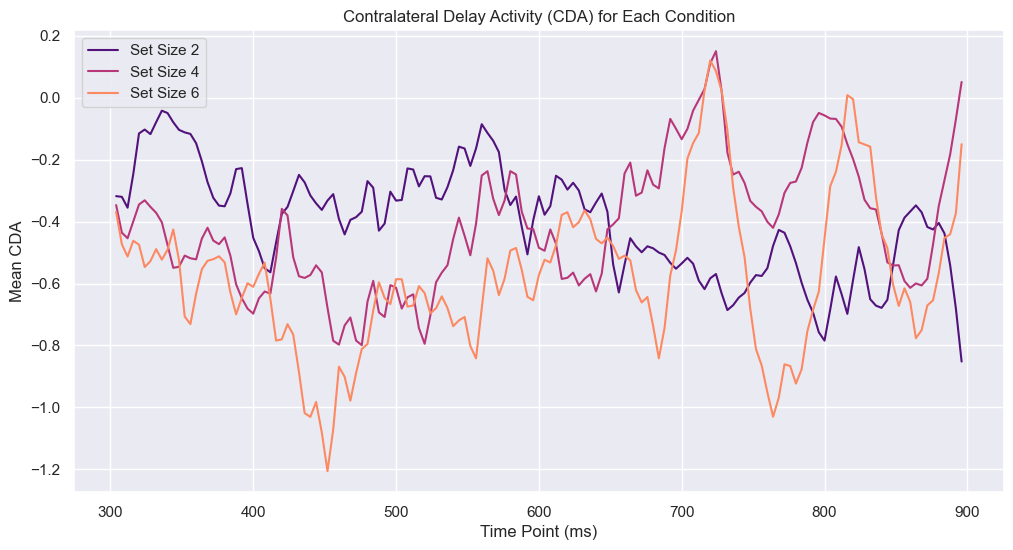

In [106]:
# Setting up the plot style with a dark theme
sns.set_theme(style='darkgrid')
custom_palette = sns.color_palette("magma", len(data['setsize'].unique()))
sns.set_palette(custom_palette)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the mean CDA for each set size
for set_size in data['setsize'].unique():
    subset_data = data[data['setsize'] == set_size]
    mean_cda_per_timepoint = subset_data.groupby('timepoint')['meanCDA'].mean()
    sns.lineplot(data=mean_cda_per_timepoint, x=mean_cda_per_timepoint.index, y=mean_cda_per_timepoint.values, label=f'Set Size {set_size}')

# Adding labels, title, and legend
plt.xlabel('Time Point (ms)')
plt.ylabel('Mean CDA')
plt.title('Contralateral Delay Activity (CDA) for Each Condition')
plt.legend()

# Set the background color to black with transparency (0.1 alpha)
fig.patch.set_edgecolor((0.3,0.8,0.9,0.1))

plt.show()

# Summary Statistics of CDA data

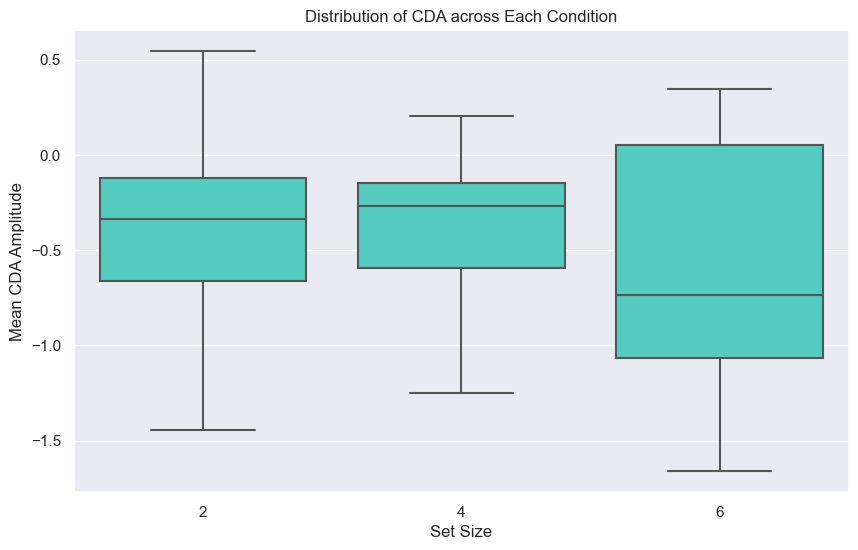

,count,mean,std,min,25%,50%,75%,max
setsize,,,,,,,,
2,11.0,-0.400842,0.556467,-1.443631,-0.660854,-0.335201,-0.118652,0.545084
4,11.0,-0.414452,0.433259,-1.250339,-0.590816,-0.265765,-0.147918,0.202485
6,11.0,-0.576343,0.739577,-1.660959,-1.064931,-0.735250,0.053062,0.348163


In [107]:
# Compute summary statistics
summary_statistics = data_2.groupby('setsize')['meanCDA'].describe()

# Plot the mean CDA amplitude for each set size
plt.figure(figsize=(10, 6))
sns.boxplot(x='setsize', y='meanCDA', data=data_2, color='turquoise')
plt.title('Distribution of CDA across Each Condition')
plt.xlabel('Set Size')
plt.ylabel('Mean CDA Amplitude')
#plt.savefig('meanCDA_ss', dpi=300, bbox_inches='tight')
plt.show()

summary_statistics


In [108]:
# Calculating the average CDA value across timepoints for each set size per subject
avg_data = data.groupby(['subj', 'setsize'])['meanCDA'].mean().reset_index()

# Renaming the columns for clarity
avg_data.rename(columns={'meanCDA': 'avgCDA'}, inplace=True)

# Displaying the first few rows of the summarized data
avg_data.head()



,subj,setsize,avgCDA
0,4,2,0.148595
1,4,4,-0.171577
2,4,6,0.348163
3,5,2,-0.230353
4,5,4,0.202485


# Statistical Analysis

### Aim:
The aim of this analysis is to investigate whether the contralateral delay activity (CDA) amplitude varies across different set sizes (2, 4, 6) in a change detection task. Understanding this relationship may shed light on the working memory capacity of the participant.

### Plan:
1. **Data Exploration**: Understand the distribution of CDA amplitude for different set sizes.
2. **Assumption Checks**: Verify normality and sphericity assumptions.
3. **Statistical Test**: Perform repeated measures ANOVA.
4. **Post-hoc Analysis**: If significant effects are found, identify where the differences lie between conditions.
5. **Effect Size Calculation**: Determine the size of the effect to understand the practical significance.

### Factors:
- **Within-Subject Factor**: Set Size (with 3 levels: 2, 4, 6). This is the independent variable.
- **Dependent Variable**: Mean CDA Amplitude. This is the dependent variable that we want to compare across the different set sizes.

### Effect Sizes:
- **Partial Eta Squared $eta_p^2$**: Commonly used in ANOVA to represent the proportion of total variance attributed to a factor, relative to the total variance plus the error variance.
- **Cohen's d**: If post-hoc pairwise comparisons are needed, Cohen's d can be used to understand the standardized difference between two means.

#### Assumptions:

1. **Normality**: The dependent variable (mean CDA amplitude) should be approximately normally distributed for each level of the within-subject factor (set size). We can check this with a Shapiro-Wilk test or visually with Q-Q plots.
2. **Sphericity**: This assumption means that the variances of the differences between all possible pairs of within-subject conditions should be equal. We can check this using Mauchly's test.

#### Step 1: Check Normality

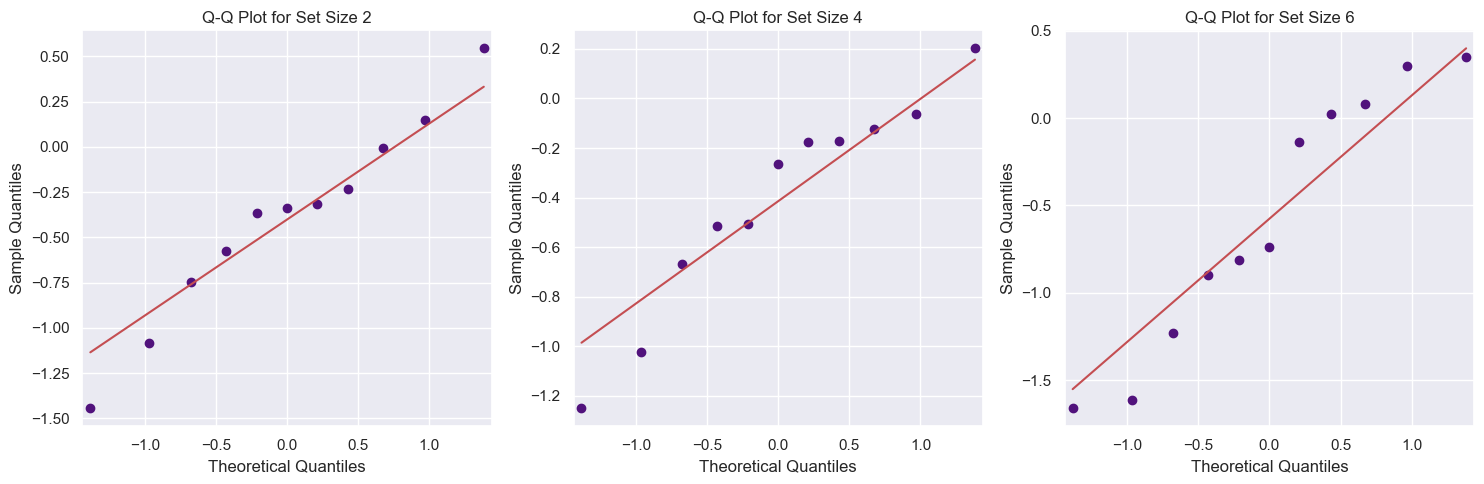

{2: 0.9652822017669678, 4: 0.4933992922306061, 6: 0.2641741633415222}

In [109]:
from scipy.stats import shapiro
import statsmodels.api as sm

# Check normality for each set size using Shapiro-Wilk test and Q-Q plots
normality_results = {}

plt.figure(figsize=(15, 5))

for idx, setsize in enumerate(data_2['setsize'].unique(), 1):
    # Extracting mean CDA amplitude for the given set size
    sample_data = data_2[data_2['setsize'] == setsize]['meanCDA']
    
    # Performing Shapiro-Wilk test
    shapiro_test_stat, shapiro_p_value = shapiro(sample_data)
    normality_results[setsize] = shapiro_p_value
    
    # Plotting Q-Q plot
    plt.subplot(1, 3, idx)
    sm.qqplot(sample_data, line='s', ax=plt.gca())
    plt.title(f'Q-Q Plot for Set Size {setsize}')

plt.tight_layout()
plt.show()

normality_results

The Shapiro-Wilk test results and Q-Q plots are used to assess the normality of the data for each set size. Here's what we can observe:

- **Set Size 2**: Shapiro-Wilk p-value = 0.965, and the Q-Q plot shows points closely following the straight line.
- **Set Size 4**: Shapiro-Wilk p-value = 0.493, and the Q-Q plot shows points closely following the straight line.
- **Set Size 6**: Shapiro-Wilk p-value = 0.264, and the Q-Q plot shows points closely following the straight line.

The p-values are all greater than the common alpha level of 0.05, indicating that we fail to reject the null hypothesis of normality. The Q-Q plots also visually confirm that the data is approximately normally distributed for each set size.

---

#### Step 2: Check Sphericity

In [110]:
#Maulchy's test

sphericity_result = pg.sphericity(data=data_2, dv='meanCDA', within='setsize', subject='subj')


sphericity_result


SpherResults(spher=True, W=0.6635973017968857, chi2=3.6907180801418122, dof=2, pval=0.15796859365151586)

- **Sphericity (spher)**: True, indicating that the assumption of sphericity is met.
- **W**: 0.664, the test statistic for Mauchly's test.
- **Chi-Squared (chi2)**: 3.69, the chi-squared value.
- **Degrees of Freedom (dof)**: 2.
- **p-value (pval)**: 0.158, which is greater than the common alpha level of 0.05.

#### Interpretation:

The p-value greater than 0.05 indicates that we fail to reject the null hypothesis that the variances of the differences between all possible pairs of within-subject conditions (set sizes) are equal. In other words, the sphericity assumption is met.

## Statistical Testing: Repeated Measures ANOVA

- **Why**: Since the same subjects are used for each set size (a within-subject design), and we want to test if there are differences in mean CDA amplitude across these levels, repeated measures ANOVA is appropriate.
- **Assumptions**: Normality and sphericity, which have already been checked and met.

----


- **Null Hypothesis \(H_0\)**: There is no significant difference in the mean CDA across the different set sizes (2, 4, 6 set sizes).

- **Alternative Hypothesis \(H_1\)**: There is a significant difference in the mean CDA across the different set sizes.

In [111]:
import pingouin as pg

# Perform repeated measures ANOVA
rm_anova_result = pg.rm_anova(data, dv='meanCDA', within='setsize', subject='subj')

# Print the result
rm_anova_result


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,setsize,2,20,1.307464,0.29265,0.019685,0.748277


- **Source**: Set size, the within-subject factor with 3 levels (2, 4, 6).
- **ddof1**: 2, the degrees of freedom for the numerator (between-groups), calculated as \( k - 1 \), where \( k \) is the number of levels of the within-subject factor.
- **ddof2**: 20, the degrees of freedom for the denominator (within-groups), calculated as \( (k - 1) \times (n - 1) \), where \( n \) is the number of subjects.
- **F**: 1.307, the F-statistic, representing the ratio of the between-groups variance to the within-groups variance.
- **p-unc**: 0.293, the p-value, indicating the probability of observing an F-statistic as extreme as the one obtained if the null hypothesis is true.
- **ng2**: 0.0197, the generalized eta-squared effect size, a measure of the proportion of variance accounted for by the set size.
- **eps**: 0.748, the epsilon value, a measure of the degree to which the sphericity assumption is met (values close to 1 indicate that sphericity is not violated).

### Interpretation:

- **F-Statistic and p-value**: The p-value of 0.293 is greater than the common alpha level of 0.05, meaning that we fail to reject the null hypothesis that the mean CDA amplitudes are the same across the different set sizes.
- **Effect Size**: The generalized eta-squared effect size of 0.0197 is small, suggesting that even if there were a significant effect, it would explain a small proportion of the variance in mean CDA amplitude.

### Conclusion:
The results suggest that there is no statistically significant difference in mean CDA amplitude across the set sizes (2, 4, 6) in this sample. The small effect size further supports the conclusion that set size does not have a substantial impact on CDA amplitude in the context of the experiment conducted.

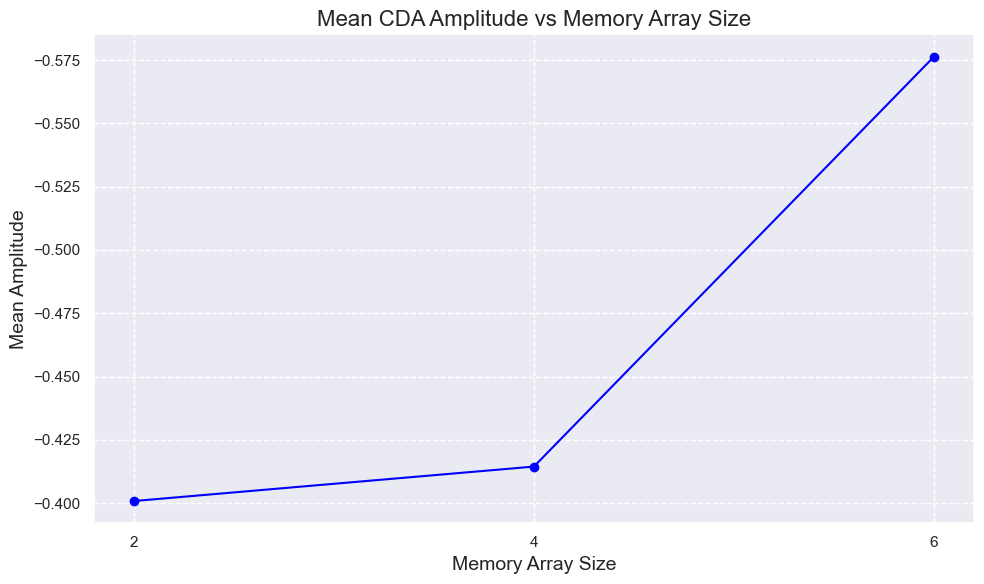

In [112]:
# Calculating the mean CDA for each set size
set_size_plot = data_2.groupby('setsize')['meanCDA'].mean()

# Plotting the line graph with markers for mean amplitude vs memory array size
plt.figure(figsize=[10, 6])
plt.plot(set_size_plot.index, set_size_plot.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Memory Array Size', fontsize=14)
plt.ylabel('Mean Amplitude', fontsize=14)
plt.title('Mean CDA Amplitude vs Memory Array Size', fontsize=16)
plt.xticks(ticks=[2, 4, 6])
plt.gca().invert_yaxis()  # Inverting the y-axis
plt.grid(axis='both', linestyle='--')
plt.tight_layout()
#plt.savefig('CDAvMemArr.png', dpi=300, bbox_inches='tight')
plt.show()


# Behavioural Data Statistics

In [113]:
# Sample list (replace this with your actual data)
selected_subj = ['All', '4', '5', '6', '7', '8']

# Filter the list to retain only integer values
filtered_subj = [int(x) for x in selected_subj if x.isdigit()]

# Display the filtered list
print(filtered_subj)


[4, 5, 6, 7, 8]


In [114]:
fname = 'subjK_setsize.csv'
data_Behav = pd.read_csv(fname, index_col=0)

data_Behav


,subj,meank
1,4,1.014996
2,5,1.199686
3,6,0.603787
4,7,0.411756
5,8,2.438202
6,9,0.894661
7,10,1.873103
8,11,1.430911
9,13,1.113284
10,14,1.085806


----

The behavioral data consists of three columns:
- `Unnamed: 0`: An index column, which we can ignore.
- `subj`: The subject identifier.
- `meank`: The memory capacity (\( K \)) for each subject, calculated as $ K = S \times (H - F) $, where $(S)$ is the size of the array, $(H)$ is the observed hit rate, and $(F)$ is the false alarm rate.

### Analysis Steps:

1. **Filter Participants**: Reject participants with \( K < 1 \).
2. **Summary Statistics**: Compute summary statistics for the memory capacity \( K \) to understand its distribution.
3. **Visualize the Data**: Plot the distribution of \( K \) to visually inspect the data.
4. **Relate with CDA Activity**: If needed, we can explore the relationship between \( K \) and CDA amplitude to understand the connection between memory capacity and neural activity.

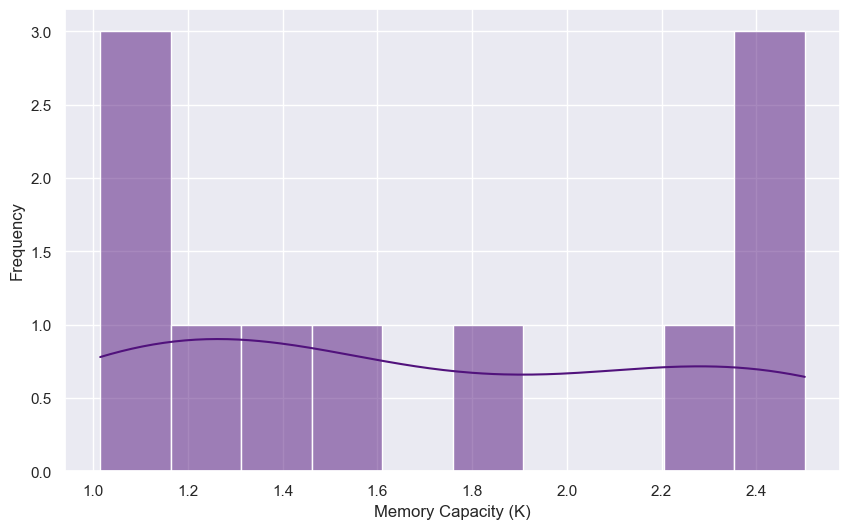

In [115]:
# Filter participants with K < 1
behavioral_data = data_Behav[data_Behav['meank'] >= 1]

# Compute summary statistics for memory capacity K
summary_statistics_k = behavioral_data['meank'].describe()

summary_statistics_k


# Plot the distribution of memory capacity K
plt.figure(figsize=(10, 6))
sns.histplot(behavioral_data['meank'], bins=10, kde=True)
#\plt.title('Distribution of Memory Capacity (K) for Participants with K >= 1')
plt.xlabel('Memory Capacity (K)')
plt.ylabel('Frequency')
#plt.savefig('KCap.png', dpi=300, bbox_inches='tight')
plt.show()

The distribution of memory capacity $(K)$ for participants with $(K\geq 1)$ is depicted in the histogram, and the summary statistics provide additional insights:

- **Count**: There are 11 participants with $(K\geq 1)$.
- **Mean**: The mean memory capacity is approximately $1.71$.
- **Standard Deviation**: The standard deviation of $0.60$ indicates the spread or variability in memory capacity.
- **Minimum & Maximum**: The memory capacity ranges from approximately $1.01$ to $2.50$.

### Interpretation:

- **Memory Capacity Distribution**: The histogram shows the distribution of memory capacity, with most values clustered around the mean.
- **Rejection Criteria**: Rejected participants with $(K<1)$, as these participants seemed to not have paid much attention to the task, their behavioral performance is not very good.

In [116]:
# Merge the CDA data with the filtered behavioral data containing K values
merged_data = pd.merge(data_2, behavioral_data[['subj', 'meank']], on='subj', how='inner')

# Function to compute the amplitude increase between two set sizes
def compute_amplitude_increase(data, size1, size2):
    data_size1 = data_2[data_2['setsize'] == size1].set_index('subj')['meanCDA']
    data_size2 = data_2[data_2['setsize'] == size2].set_index('subj')['meanCDA']
    return (data_size2 - data_size1).reset_index()

# Compute the amplitude increase between set sizes 2 and 4, and 4 and 6
amplitude_increase_2_4 = compute_amplitude_increase(merged_data, 2, 4)
amplitude_increase_4_6 = compute_amplitude_increase(merged_data, 4, 6)

# Merge with the memory capacity (K) values
amplitude_increase_2_4 = pd.merge(amplitude_increase_2_4, behavioral_data[['subj', 'meank']], on='subj')
amplitude_increase_4_6 = pd.merge(amplitude_increase_4_6, behavioral_data[['subj', 'meank']], on='subj')

# Compute the correlation between amplitude increase and memory capacity (K) for both cases
correlation_2_4 = amplitude_increase_2_4['meanCDA'].corr(amplitude_increase_2_4['meank'])
correlation_4_6 = amplitude_increase_4_6['meanCDA'].corr(amplitude_increase_4_6['meank'])

correlation_2_4, correlation_4_6


(0.019455750598006624, -0.45148908554697986)

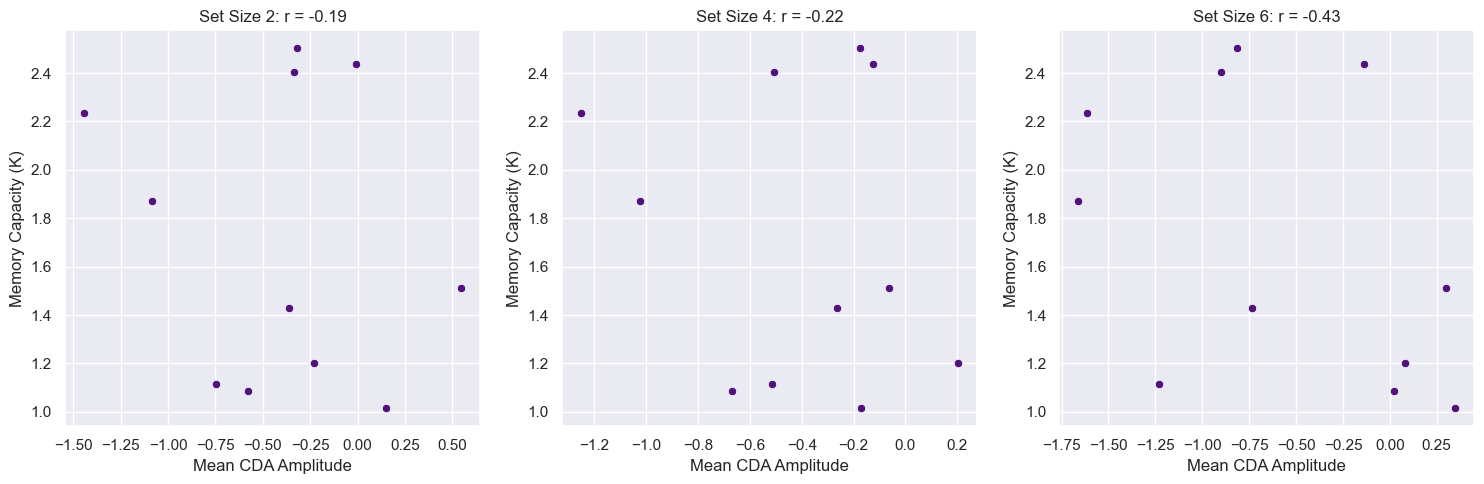

{2: (-0.18504219757013024, 0.5859564438259984),
 4: (-0.2247019505844855, 0.5065176814641558),
 6: (-0.43321137085830885, 0.18318974400454113)}

In [117]:
from scipy import stats

# Create a figure for the scatter plots
plt.figure(figsize=(15, 5))

# Store correlation results
correlation_results = {}

# Iterate through set sizes and calculate correlation and visualize the relationship
for idx, setsize in enumerate(merged_data['setsize'].unique(), 1):
    subset_data = merged_data[merged_data['setsize'] == setsize]
    correlation_coefficient, p_value = stats.pearsonr(subset_data['meanCDA'], subset_data['meank'])
    correlation_results[setsize] = (correlation_coefficient, p_value)
    
    # Scatter plot for the relationship between mean CDA amplitude and memory capacity K
    plt.subplot(1, 3, idx)
    sns.scatterplot(x='meanCDA', y='meank', data=subset_data)
    plt.title(f'Set Size {setsize}: r = {correlation_coefficient:.2f}')
    plt.xlabel('Mean CDA Amplitude')
    plt.ylabel('Memory Capacity (K)')

plt.tight_layout()
#plt.savefig('CDAKcorr.png', dpi=300, bbox_inches='tight')
plt.show()

correlation_results


### Exploring the Relationship between CDA Activity and \( K \):

- **Set Size 2**: Correlation = -0.19, p-value = 0.59
- **Set Size 4**: Correlation = -0.22, p-value = 0.51
- **Set Size 6**: Correlation = -0.43, p-value = 0.18

### Interpretation:

- **Correlation Direction**: The negative correlation indicates that as mean CDA amplitude increases, memory capacity \( K \) tends to decrease, although the strength of this relationship is weak.
- **Significance**: None of the correlations are statistically significant at the conventional alpha level of 0.05, as indicated by the p-values.
- **Set Size Variation**: The relationship between CDA amplitude and \( K \) does not appear to change substantially with different set sizes.

### Conclusion:

The analysis does not provide strong evidence for a significant relationship between CDA activity (mean CDA amplitude) and memory capacity (\( K \)) in the context of this change detection task. The weak negative correlation across different set sizes suggests a potential trend, but the lack of statistical significance indicates that this finding should be interpreted with caution.


The analysis performed to explore the relationship between CDA activity and memory capacity, present the scatter plots, and discuss the correlation coefficients. You may also reflect on the potential reasons for the observed patterns (or lack thereof) and consider how these findings fit within the broader context of understanding working memory capacity.

---- 

### Power Analysis

- **Effect Size**: A large effect size, which is a common assumption when there's no specific estimate from previous studies. For Cohen's \( f \), a large effect size is typically around 0.5.
- **Alpha Level**: \(alpha = 0.05\), the common significance level.
- **Power**: 0.8, the typical target for statistical power.

In [118]:
# Importing library for power analysis
from statsmodels.stats.power import FTestAnovaPower

# Parameters for power analysis
effect_size = 0.7  # large effect size
alpha = 0.05       # Significance level
power = 0.8       # Target power
num_groups = 3     # Number of set sizes (2, 4, 6)

# Calculating the number of observations required
ftest_power = FTestAnovaPower()
n_obs_required = ftest_power.solve_power(effect_size=effect_size, alpha=alpha, power=power, k_groups=num_groups)
# Number of participants in the study
n_participants = data['subj'].nunique()

# Result
n_obs_required, n_participants


(22.940723773074648, 11)

The power analysis results indicate the following:

- **Required Sample Size**: Approximately 23 participants are required to detect a medium effect size with a significance level of 0.05 and a power of 0.80 for the repeated measures ANOVA.
- **Current Sample Size**: 11 participants in the study.

Given these results, the current sample size is not large enough to achieve the desired power for detecting a medium effect size. Increasing the sample size would improve the statistical power and the ability to detect differences between the set sizes.